In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
!pip install lazypredict

In [ ]:
from sklearn.preprocessing import StandardScaler
#from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import NuSVR, SVR
from sklearn.linear_model import (LassoLars, ElasticNet, Lasso,
                                  LassoLarsCV, LarsCV, LassoCV,
                                  ElasticNetCV, LassoLarsIC)
from sklearn.linear_model import (OrthogonalMatchingPursuitCV,
                                  OrthogonalMatchingPursuit,
                                  RANSACRegressor,
                                  SGDRegressor, HuberRegressor,
                                  PassiveAggressiveRegressor,
                                  LinearRegression, TweedieRegressor,
                                  BayesianRidge, ARDRegression,
                                  Ridge, RidgeCV)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              BaggingRegressor)
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
from sklearn.metrics import classification_report


In [ ]:
import yfinance as yf
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    """
    Fetches stock data for the given ticker symbol within the specified time period.

    Parameters:
        ticker (str): Ticker symbol of the stock.
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
        DataFrame: Stock data for the specified time period.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Specify the date range
start_date = '2010-04-05'  # Example start date
end_date = '2024-01-01'    # Example end date

# Fetch stock data for BMW within the specified time period
df= get_stock_data('VOLV-B.ST', start_date, end_date)
#VOLV-B.ST
# Display the stock data
display(df)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-06,74.099998,77.349998,74.099998,77.150002,48.650433,10862994
2010-04-07,77.349998,77.449997,75.900002,76.550003,48.272076,7762621
2010-04-08,76.000000,77.000000,75.550003,76.699997,48.366650,10904102
2010-04-09,77.500000,77.849998,76.800003,77.250000,48.713490,6330862
2010-04-12,77.500000,78.000000,77.150002,77.650002,48.965733,3837824
...,...,...,...,...,...,...
2023-12-21,260.799988,261.000000,258.399994,259.649994,251.075287,2007782
2023-12-22,259.299988,261.149994,259.100006,259.750000,251.171997,1608410
2023-12-27,260.200012,262.799988,260.000000,261.899994,253.250992,2151781


In [ ]:
df.to_csv('fulldata.csv')

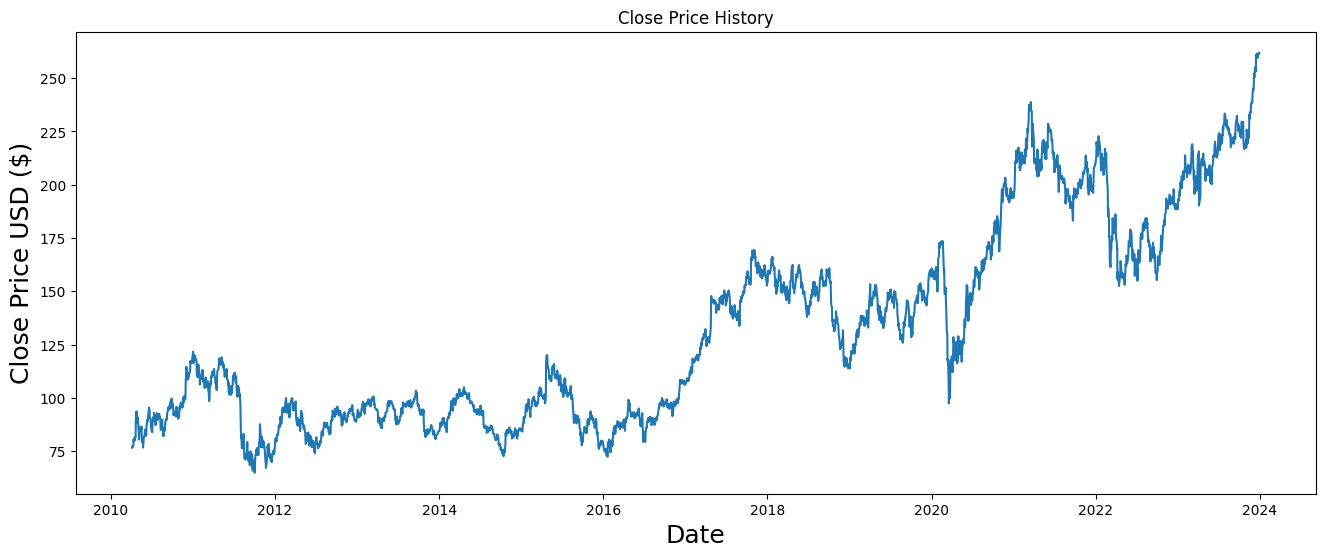

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3285

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data #scaled full data

array([[0.06194468],
       [0.05889823],
       [0.05965981],
       ...,
       [1.        ],
       [0.99822287],
       [0.99898461]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]  #training data actual
print('fgf')
display(train_data)
# Split the data into x_train and y_train data sets


fgf


array([[0.06194468],
       [0.05889823],
       [0.05965981],
       ...,
       [0.74206657],
       [0.75983758],
       [0.7443514 ]])

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        pass
        #print(x_train)
        #print(y_train)


# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
display(pd.DataFrame(x_train))
display(y_train)
# Reshape the data
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.061945,0.058898,0.059660,0.062452,0.064483,0.079462,0.075908,0.078954,0.081239,0.077177,...,0.123382,0.136837,0.142168,0.155116,0.147245,0.147753,0.130236,0.128459,0.108657,0.113734
1,0.058898,0.059660,0.062452,0.064483,0.079462,0.075908,0.078954,0.081239,0.077177,0.085047,...,0.136837,0.142168,0.155116,0.147245,0.147753,0.130236,0.128459,0.108657,0.113734,0.101803
2,0.059660,0.062452,0.064483,0.079462,0.075908,0.078954,0.081239,0.077177,0.085047,0.084031,...,0.142168,0.155116,0.147245,0.147753,0.130236,0.128459,0.108657,0.113734,0.101803,0.100787
3,0.062452,0.064483,0.079462,0.075908,0.078954,0.081239,0.077177,0.085047,0.084031,0.085301,...,0.155116,0.147245,0.147753,0.130236,0.128459,0.108657,0.113734,0.101803,0.100787,0.096471
4,0.064483,0.079462,0.075908,0.078954,0.081239,0.077177,0.085047,0.084031,0.085301,0.127190,...,0.147245,0.147753,0.130236,0.128459,0.108657,0.113734,0.101803,0.100787,0.096471,0.116527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,0.707540,0.716933,0.717441,0.697385,0.713887,0.716679,0.720487,0.726327,0.755776,0.740036,...,0.753237,0.764915,0.636151,0.643564,0.657070,0.729627,0.735974,0.739274,0.747906,0.745875
3221,0.716933,0.717441,0.697385,0.713887,0.716679,0.720487,0.726327,0.755776,0.740036,0.720487,...,0.764915,0.636151,0.643564,0.657070,0.729627,0.735974,0.739274,0.747906,0.745875,0.731912
3222,0.717441,0.697385,0.713887,0.716679,0.720487,0.726327,0.755776,0.740036,0.720487,0.724296,...,0.636151,0.643564,0.657070,0.729627,0.735974,0.739274,0.747906,0.745875,0.731912,0.742574
3223,0.697385,0.713887,0.716679,0.720487,0.726327,0.755776,0.740036,0.720487,0.724296,0.714648,...,0.643564,0.657070,0.729627,0.735974,0.739274,0.747906,0.745875,0.731912,0.742574,0.742067


array([0.10180251, 0.10078703, 0.09647119, ..., 0.74206657, 0.75983758,
       0.7443514 ])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)
#0.0077
#0.0064 when  2011-01-01

Epoch 1/10
101/101 [==============================] - 24s 172ms/step - loss: 0.0336
Epoch 2/10
101/101 [==============================] - 10s 101ms/step - loss: 0.0180
Epoch 3/10
101/101 [==============================] - 11s 107ms/step - loss: 0.0163
Epoch 4/10
101/101 [==============================] - 11s 107ms/step - loss: 0.0160
Epoch 5/10
101/101 [==============================] - 9s 90ms/step - loss: 0.0140
Epoch 6/10
101/101 [==============================] - 11s 108ms/step - loss: 0.0132
Epoch 7/10
101/101 [==============================] - 11s 108ms/step - loss: 0.0127
Epoch 8/10
101/101 [==============================] - 11s 111ms/step - loss: 0.0137
Epoch 9/10
101/101 [==============================] - 10s 104ms/step - loss: 0.0115
Epoch 10/10
101/101 [==============================] - 10s 103ms/step - loss: 0.0111


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
#4.95
#2.95
#4/42

6/6 [==============================] - 1s 29ms/step


3.3809266493846524

<ipython-input-13-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


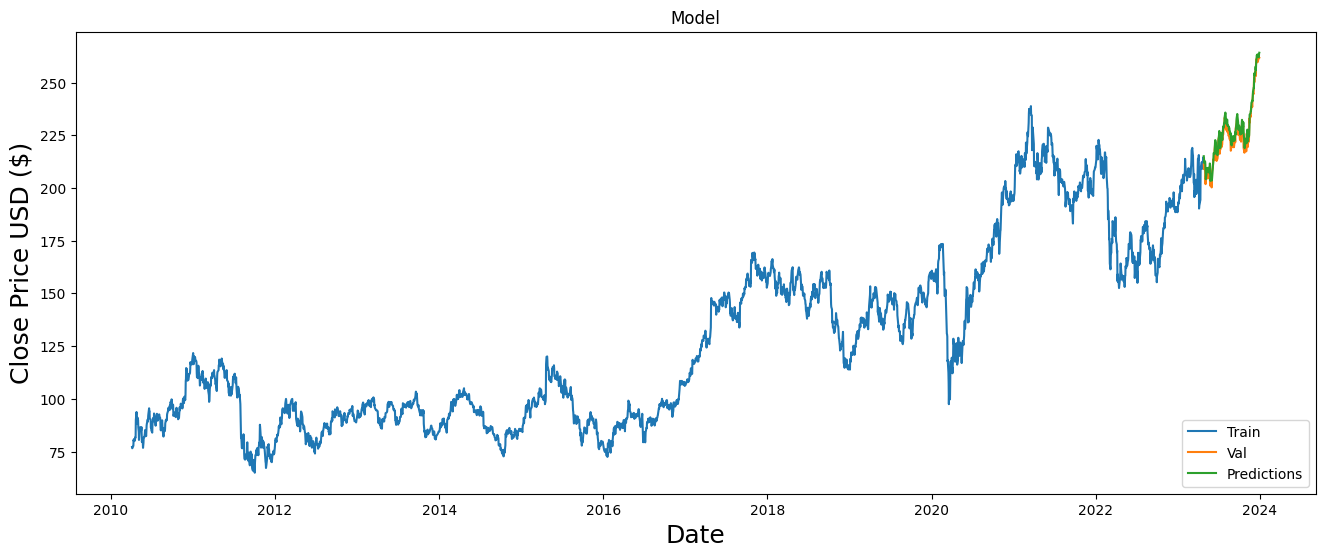

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<Axes: xlabel='Date'>

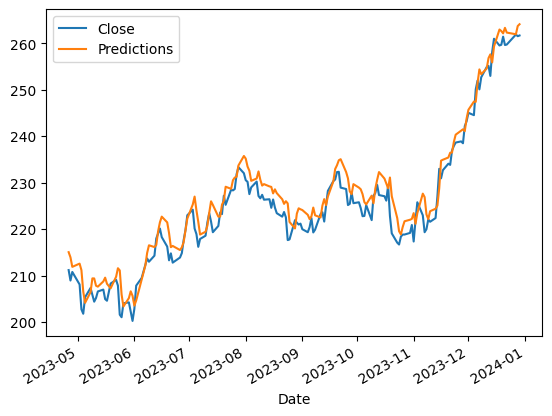

In [ ]:
valid.plot()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-06,74.099998,77.349998,74.099998,77.150002,48.650433,10862994
2010-04-07,77.349998,77.449997,75.900002,76.550003,48.272076,7762621
2010-04-08,76.000000,77.000000,75.550003,76.699997,48.366650,10904102
2010-04-09,77.500000,77.849998,76.800003,77.250000,48.713490,6330862
2010-04-12,77.500000,78.000000,77.150002,77.650002,48.965733,3837824
...,...,...,...,...,...,...
2023-12-21,260.799988,261.000000,258.399994,259.649994,251.075287,2007782
2023-12-22,259.299988,261.149994,259.100006,259.750000,251.171997,1608410
2023-12-27,260.200012,262.799988,260.000000,261.899994,253.250992,2151781


In [ ]:


# Initialize the scaler
scaler_minmax = MinMaxScaler()

scaler = StandardScaler()

# Fit the scaler to your features and transform them

df['TomorrowClose'] = df['Close'].shift(-1)

# Create binary label
df['Target'] = (df['TomorrowClose'] > df['Close']).astype(int)

# Drop rows with NaN values (since there's no tomorrow's data for the last day)
df.dropna(inplace=True)

# Select features (X) and label (Y)
X = df[[ 'Close' ]]
Y = df['Target']

X = df.drop(['Target', df.columns[0]], axis=1)
X = X.drop(['TomorrowClose', ], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X)

,High,Low,Close,Adj Close,Volume
Date,,,,,
2010-04-06,77.349998,74.099998,77.150002,48.650433,10862994
2010-04-07,77.449997,75.900002,76.550003,48.272076,7762621
2010-04-08,77.000000,75.550003,76.699997,48.366650,10904102
2010-04-09,77.849998,76.800003,77.250000,48.713490,6330862
2010-04-12,78.000000,77.150002,77.650002,48.965733,3837824
...,...,...,...,...,...
2023-12-20,262.100006,258.700012,261.450012,252.815872,2920512
2023-12-21,261.000000,258.399994,259.649994,251.075287,2007782
2023-12-22,261.149994,259.100006,259.750000,251.171997,1608410


In [ ]:
selected_features = {}
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)  # Adjust k as needed
X_train_univariate = selector.fit_transform(X_train_scaled, y_train)
selected_features['Univariate'] = X_train.columns[selector.get_support()]

# 2. Feature Importance from Trees
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
feature_importances = clf.feature_importances_
sfm = SelectFromModel(clf, threshold='median')
X_train_trees = sfm.fit_transform(X_train_scaled, y_train)
selected_features['Trees'] = X_train.columns[sfm.get_support()]

# 3. L1 Regularization (LASSO)
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(penalty='l1', solver='liblinear')
l1_model.fit(X_train_scaled, y_train)
sfm_l1 = SelectFromModel(l1_model)
X_train_l1 = sfm_l1.fit_transform(X_train_scaled, y_train)
selected_features['LASSO'] = X_train.columns[sfm_l1.get_support()]

# 4. Correlation Analysis
correlation_matrix = df.corr()
selected_features['Correlation'] = correlation_matrix.index[abs(correlation_matrix['Target']) > 0.1].values

# You can add more feature selection techniques here...

# Print selected features for each technique
for technique, features in selected_features.items():
    print(f"Selected features for {technique}:\n{features}")

# Optionally, you can store the selected features in separate variables or files for later use

Selected features for Univariate:
Index(['High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Selected features for Trees:
Index(['High', 'Adj Close', 'Volume'], dtype='object')
Selected features for LASSO:
Index(['Low', 'Volume'], dtype='object')
Selected features for Correlation:
['Target']


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4985549132947977


In [ ]:
def simple_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Defining a convolutional neural network (CNN) model
def cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Training and evaluating the simple feedforward neural network model
simple_nn = simple_model()
simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=1)
simple_nn_accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Simple NN Accuracy:", simple_nn_accuracy)

# Training and evaluating the convolutional neural network (CNN) model
cnn = cnn_model()
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=1)
cnn_accuracy = cnn.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/30
87/87 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4935
Epoch 2/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5065
Epoch 3/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5083
Epoch 4/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 5/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5072
Epoch 6/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5116
Epoch 7/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5090
Epoch 8/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5170
Epoch 9/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5271
Epoch 10/30
87/87 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4989
Epoch 11/30
87/87 [

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import layers, Sequential

# Assuming your input data has timesteps
timesteps = X_train_scaled.shape[1]  # Number of timesteps
features = X_train_scaled.shape[2] if len(X_train_scaled.shape) > 2 else 1  # Number of features per timestep
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=False)),
    layers.Dropout(0.2),
    layers.Dense(256),  # Output layer

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
#learning_rate = 0.00001
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
#, callbacks=[early_stopping]
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(Y_train_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
78/78 [==============================] - 41s 192ms/step - loss: 0.6953 - accuracy: 0.4901 - val_loss: 0.6932 - val_accuracy: 0.4729
Epoch 2/50
78/78 [==============================] - 9s 119ms/step - loss: 0.6954 - accuracy: 0.5002 - val_loss: 0.6930 - val_accuracy: 0.5199
Epoch 3/50
78/78 [==============================] - 11s 147ms/step - loss: 0.6934 - accuracy: 0.5062 - val_loss: 0.6940 - val_accuracy: 0.4801
Epoch 4/50
78/78 [==============================] - 10s 134ms/step - loss: 0.6937 - accuracy: 0.4801 - val_loss: 0.6931 - val_accuracy: 0.5199
Epoch 5/50
78/78 [==============================] - 8s 101ms/step - loss: 0.6941 - accuracy: 0.4978 - val_loss: 0.6944 - val_accuracy: 0.4801
Epoch 6/50
78/78 [==============================] - 10s 123ms/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6924 - val_accuracy: 0.5199
Epoch 7/50
78/78 [==============================] - 8s 97ms/step - loss: 0.6935 - accuracy: 0.4869 - val_loss: 0.6928 - val_accuracy: 0.5199
Epo

NameError: name 'Y_train_scaled' is not defined

In [ ]:
print(Y.value_counts())


In [ ]:
models = [
    NuSVC(), SVC(), LogisticRegression(), KNeighborsClassifier(),
    DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
    GradientBoostingClassifier(), GaussianNB(), DummyClassifier()
]
model_results_dict = {}

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted'+model_name: y_pred
    })
    # Add a column for model name
    # Concatenate the results with the main DataFrame
    model_results_dict[model_name] = model_results

# Reset index of the results DataFrame
for model_name, df in model_results_dict.items():
    print(f"Results for {model_name}:")
    display(df['Predicted'+model_name].value_counts())


In [ ]:
concatenated_df = pd.concat(model_results_dict.values(), axis=1)

# Display the concatenated dataframe
display(concatenated_df)

In [ ]:
combined_df = pd.concat([X_test.reset_index(drop=True), concatenated_df], axis=1)

# Display the combined dataframe
display(combined_df)


In [ ]:
combined_df['Sum_of_Ones'] = combined_df.filter(like='Predicted').sum(axis=1)

# Display the updated dataframe
display(combined_df)

In [ ]:
combined_df=pd.read_csv('combined (4).csv')

In [ ]:
combined_df

In [ ]:
# Original list of columns
original_cols = ['Actual', 'Sum_of_Ones',
                 'PredictedNuSVC',  'PredictedSVC',
                 'PredictedLogisticRegression',  'PredictedKNeighborsClassifier',
                'PredictedDecisionTreeClassifier',  'PredictedRandomForestClassifier',
                 'PredictedAdaBoostClassifier',  'PredictedGradientBoostingClassifier',
                 'PredictedGaussianNB',  'PredictedDummyClassifier']


# Calculate correlation
correlation = combined_df.corr()

correlation

In [ ]:
for i in range(0, 8):
  count = len(combined_df[(combined_df['Actual'] == 1) & (combined_df['Sum_of_Ones'] > i)])

  print("Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than"+str(i), count)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# List of models to ensemble
models = [
    ('NuSVC', NuSVC()), ('SVC', SVC()), ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()), ('GaussianNB', GaussianNB()),
    ('DummyClassifier', DummyClassifier())
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Train and evaluate each model
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    # Add a column for model name
    model_results['Model'] = model_name
    # Concatenate the results with the main DataFrame
    results_df = pd.concat([results_df, model_results])

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print("Results DataFrame:")
print(results_df)

# Ensemble models using hard voting
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# Calculate classification report for the ensemble model
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred_ensemble))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred))

In [ ]:
models = [
    NuSVR(), LassoLars(), DummyRegressor(), ElasticNet(), Lasso(),
    LassoLarsCV(), LarsCV(), LassoCV(), ElasticNetCV(), LassoLarsIC(),
    OrthogonalMatchingPursuitCV(), OrthogonalMatchingPursuit(),
    PoissonRegressor(), TweedieRegressor(), BayesianRidge(), Ridge(),
    RidgeCV(), LinearRegression(),
     HuberRegressor(), SGDRegressor(), AdaBoostRegressor(),
    MLPRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(),
    RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(),
    BaggingRegressor(), XGBRegressor(), SVR(),
    ExtraTreeRegressor(), RANSACRegressor(), DecisionTreeRegressor(),
    PassiveAggressiveRegressor(), GaussianProcessRegressor()
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print the difference between predicted and actual values
    diff = y_test - y_pred
    print(f"Difference between predicted and actual values for {model_name}:")
    print(diff)
    print()

In [ ]:
results_df = pd.DataFrame()

for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    # Add a column for model name
    model_results['Model'] = model_name
    # Concatenate the results with the main DataFrame
    results_df = pd.concat([results_df, model_results])

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

In [ ]:
# Calculate residuals for each model
residuals = {}
for model_name, preds in predictions.items():
    residuals[model_name] = preds - y_test

# Print or visualize residuals
for model_name, resid in residuals.items():
    print(f"Model: {model_name}")
    print("Residuals:")
    print(resid)
    print()

In [ ]:
import matplotlib.pyplot as plt

# Plot residuals for each model
plt.figure(figsize=(10, 6))
plt.boxplot(residuals.values(), labels=residuals.keys())
plt.xlabel('Model')
plt.ylabel('Residuals')
plt.title('Residuals of Different Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.plot.line(y='Close')

In [ ]:
df['Tomorrow'] = df['Close'].shift(-1)

In [ ]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)
df

In [ ]:
train = df.iloc[:-100]
test = df.iloc[-100:]
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators=100, min_samples_split=100, random_state=1)
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test['Target'], preds)

In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:

predictions = backtest(df, model, predictors)
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])
df

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
predictions = backtest(df, model, new_predictors)
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]
predictions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, Sequential


In [ ]:
X_train = df.drop(["Tomorrow", "Target"], axis=1)  # Exclude the 'Tomorrow' column and 'Target' column from predictors
Y_train = df["Target"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20)

# Assuming your input data has timesteps
timesteps = x_train.shape[1]  # Number of timesteps
features = x_train.shape[2] if len(x_train.shape) > 2 else 1  # Number of features per timestep

# Define the model architecture
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=False)),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:


#df = pd.read_csv('https://raw.githubusercontent.com/umar-farooq-khan/m-en-dataset/main/M-En%20Dataset.csv')
y = df['target'].replace('Normal', 0).replace('Anomaly', 1)
X = df.drop(['target', df.columns[0]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

from tensorflow.keras import layers, Sequential

# Assuming your input data has timesteps
timesteps = x_train.shape[1]  # Number of timesteps
features = x_train.shape[2] if len(x_train.shape) > 2 else 1  # Number of features per timestep
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=False)),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)